In [4]:
%cd ..

/mnt/c/Users/maxli/OneDrive - Van Oord/Documents/thesis/code


In [83]:
import numpy as np
import gstools as gs
import geopandas as gpd
from glob import glob
import pandas as pd

In [99]:
pts_gdf = gpd.read_file('../data/test_sites/florida_keys/kriging_pts/')

In [100]:
# pts_gdf = pd.concat([gpd.read_file(file) for file in glob('../data/test_sites/*/kriging_pts/')])


In [101]:
x_loc = pts_gdf.geometry.x.to_numpy()
y_loc = pts_gdf.geometry.y.to_numpy()
z_elev = pts_gdf.Z.to_numpy()

In [102]:
# model = gs.Exponential(dim=2, var=2, len_scale=8)
model = gs.Circular(dim=2)

In [103]:
bins = np.arange(100)
bin_center, gamma = gs.vario_estimate((x_loc, y_loc), z_elev, bins)

In [104]:
fit_model = gs.Circular(dim=2)
fit_model.fit_variogram(bin_center, gamma, nugget=False)
print(fit_model)

Circular(dim=2, var=3.95, len_scale=4.31e+03, nugget=0.0)


(0.0, 0.2)

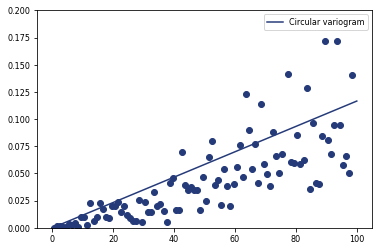

In [107]:
ax = fit_model.plot(x_max=100)
ax.scatter(bin_center, gamma)
ax.set_ylim(0,0.2)